In [1]:
print("Hello World")

Hello World


In [28]:
with open('api_keys.txt', 'r') as api_key_file:
   api_key = api_key_file.read().strip()

In [1]:
%pip install simplejson

  Obtaining dependency information for simplejson from https://files.pythonhosted.org/packages/ca/c7/a530c9aba6a47823df3d46f20ce09be730d04aeb67aaef057a7c515654bd/simplejson-3.19.2-cp310-cp310-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 1.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
endpoint = "https://api.fda.gov/food/enforcement.json"

# Set your query parameters
params = {
    'search':'reason_for_recall:"egg"',
    'limit': 200  # Adjust the limit based on your needs
}

headers = {
    'Content-Type': 'application/json',
    'api_key': api_key
}

response = requests.get(endpoint, params=params, headers=headers)

if response.status_code == 200:
    data = response.json()
else:
    print("Error:", response.status_code)

In [66]:
import pandas as pd

results = data.get('results', [])

df = pd.DataFrame(results)

In [67]:
print(df)

         status            city state        country classification openfda  \
0    Terminated        Monterey    CA  United States        Class I      {}   
1    Terminated      Amityville    NY  United States       Class II      {}   
2    Terminated       Oak Brook    IL  United States        Class I      {}   
3    Terminated        Portland    OR  United States       Class II      {}   
4    Terminated         Atlanta    GA  United States       Class II      {}   
..          ...             ...   ...            ...            ...     ...   
195  Terminated          Corona    CA  United States       Class II      {}   
196  Terminated        Monterey    CA  United States        Class I      {}   
197  Terminated  Salt Lake City    UT  United States        Class I      {}   
198     Ongoing        Norcross    GA  United States        Class I      {}   
199  Terminated          Kearns    UT  United States       Class II      {}   

    product_type event_id                          

Text(0.5, 1.0, 'Count of Recalls for Egg-Related Product Issues by State')

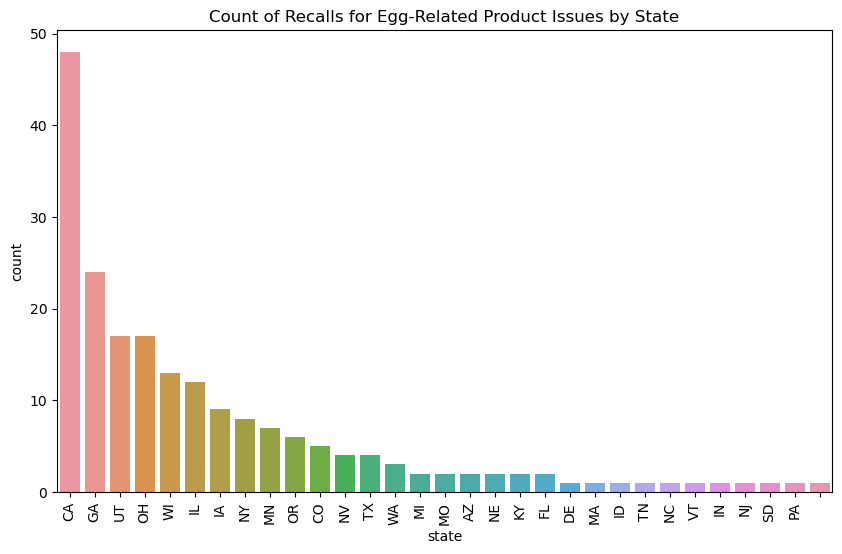

In [75]:
category_order = df['state'].value_counts().index
plt.figure(figsize=(10, 6))
sns.countplot(df, x="state", order = category_order)
plt.xticks(rotation=90) 
plt.title("Count of Recalls for Egg-Related Product Issues by State")

In [76]:
df.to_csv('FDA_egg_stats.csv', index=False)